# Autoría:

                     Manuel López Amo-Ocón
                     Alejangro Galván Pérez-Ilzarbe
                     Santiago Cebellán
                     Alejandro Meza Tudela

# COVID-19 

La enfermedad por coronavirus (COVID 19) es una enfermedad infecciosa causada por un coronavirus recientemente descubierto. La mayoría de las personas que enferman de COVID 19 experimentan síntomas de leves a moderados y se recuperan sin tratamiento especial.


# Cómo se propaga

El virus que causa la COVID‑19 se transmite principalmente a través de las gotículas generadas cuando una persona infectada tose, estornuda o espira. Estas gotículas son demasiado pesadas para permanecer suspendidas en el aire y caen rápidamente sobre el suelo o las superficies.

Usted puede infectarse al inhalar el virus si está cerca de una persona con COVID‑19 o si, tras tocar una superficie contaminada, se toca los ojos, la nariz o la boca.

Mas información:
https://www.mscbs.gob.es/profesionales/saludPublica/ccayes/alertasActual/nCov-China/home.ht

En el presente Notebook, se ha realizado una primera aproximación del comportamiento de esta enfermedad sobre una población dada. En un futuro, el código se podría adaptar para cualquier otra enfermedad. 

# Librerías

In [21]:
#Importar librerias? Pues claro que me importan!
!pip install plotly==4.7.0
!pip install seaborn==0.10.1
import numpy as np #agrega soporte para vectores y matrices, contituye biblioteca de funciones de alto nivel
from numpy import random #random permite la generacion de numeros aleatorios 
from random import choices #choices esta dedicado a la representacion de pesos 
import os 
import seaborn as sns
import matplotlib.pyplot as plt #Dedicado a la representacion grafica 
from scipy.stats import rv_discrete
import pandas as pd


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 20.2 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


# Variables globales

In [22]:
#Definicion de variables 
mediaincubacion = 7 #media de dias de la incubacion
desvincubacion = 3 #desviacion de la incubacion 
mediaduracion = 14 #media de duracion 
desvduracion = 5 #deviacion de la duracion 
posibilidadContagio = 0.4 #valor inicial, se puede cambiar 
cambioEstadoInicial = 15 #tiempo en dias que se tarda en cambiar de estado
numpersonas = 1000 #numero de personas de la simulacion 
personasedificio = 8 #numero de personas/edificio 
horassimulacion = 1000 #horas de la simulacion 
#Primera columna=rangos de edades, Segunda columna= Mortalidades totales
mortalidadEdadesCovid=[[10,20,30,40,50,60,70,80,1000],[0.01,0.2,0.2,0.2,0.4,1.3,3.6,8,14.9]]

# Definición de clases

De cara a la primera versión del simulador, se ha optado por la creación de la clase persona, y la clase simulador. 

Atributos clase persona: idpersona, edad, estados posibles, estado, lugar, lugar original, dia estado, cambio estado, contador infecciones, dni, edificio muerte

Atributos de la clase simulador: ciudad, dia, hora, numpersonas inicial, numpersonas, numedificios, capacidades, catálogo de personas, cementerio, distrEdad, registro sanos, registro muertos, mortalidades edadeds Covid

In [23]:
from PersonaV0 import *
from Simuladorv0 import *

# Funciones

In [24]:

#Funcion que permite mostrar en pantalla la ciudad
def printearciudad(ciudad):        
    for j in range(len(ciudad)):
        for i in range(len(ciudad[j])):
            print(ciudad[j][i])
        print()        
        
#Funcion que dada la ciudad, y un indice, permite imprimir el edificio que corresponda a ese indice
def printearEdificio(ciudad , i):
     for j in range(len(ciudad[i])):
        print(ciudad[i][j])
    

# Código encargado de la simulación

0,0,1000,88


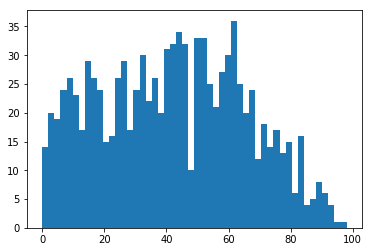

Total de vivos:1000
Total de vivos:1000
Total de vivos:1000
--------
 
 
1
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  9 10  5 19  4 12  4
  7  9  2  9  7 21  9  5  6 18 12  6 23  5 23 21 10 15 12 17 19 20 19 20
  9  1 17 18 16  7 11  3 18 14 22 10 18  2 16 17  9  9 18 20 15  6  3  1
  1 23  3  2  4  3  6 14 20 21 14  6  4  9 19  4]
1,0,1000,88
998
 
 
--------
 
 
Total de muertos:0
 
 
--------
Total de vivos:1000
Total de vivos:1000
Total de vivos:1000
--------
 
 
2
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  9 10  5 19  4 12  4
  7  9  2  9  7 21  9  5  6 18 12  6 23  5 23 21 10 15 12 17 19 20 19 20
  9  1 17 18 16  7 11  3 18 14 22 10 18  2 16 17  9  9 18 20 15  6  3  1
  1 23  3  2  4  3  6 14 20 21 14  6  4  9 19  4]
2,0,1000,88
996
 
 
--------
 
 
Total de muertos:0
 
 
--------
Total de vivos:1000
Total de vivos:1000
Total de vivos:1000
--------
 
 
3
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  9 10  5 19  4 12  4
  7  9  2  9  7 21  9  5  6 18 12 

Total de vivos:999
Total de vivos:999
--------
 
 
21
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  9 10  5 19  4 12  4
  7  9  2  9  7 21  9  5  6 18 12  6 23  5 23 21 10 15 12 17 19 20 19 20
  9  1 17 18 16  7 11  3 18 14 22 10 18  2 16 17  9  9 18 20 15  6  3  1
  1 23  3  2  4  3  6 14 20 21 14  6  4  9 19  4]
21,0,999,88
14
 
 
--------
 
 
Total de muertos:1
399,muerto,38,42638843V,66
 
 
--------
Total de vivos:999
Total de vivos:999
Total de vivos:999
--------
 
 
22
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  9 10  5 19  4 12  4
  7  9  2  9  7 21  9  5  6 18 12  6 23  5 23 21 10 15 12 17 19 20 19 20
  9  1 17 18 16  7 11  3 18 14 22 10 18  2 16 17  9  9 18 20 15  6  3  1
  1 23  3  2  4  3  6 14 20 21 14  6  4  9 19  4]
22,0,998,88
35
 
 
--------
 
 
Total de muertos:2
399,muerto,38,42638843V,66
689,muerto,58,74074570B,61
 
 
--------
Total de vivos:998
Total de vivos:998
Total de vivos:998
--------
 
 
23
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  

Total de vivos:991
Total de vivos:991
--------
 
 
38
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  9 10  5 19  4 12  4
  7  9  2  9  7 21  9  5  6 18 12  6 23  5 23 21 10 15 12 17 19 20 19 20
  9  1 17 18 16  7 11  3 18 14 22 10 18  2 16 17  9  9 18 20 15  6  3  1
  1 23  3  2  4  3  6 14 20 21 14  6  4  9 19  4]
38,0,991,88
991
 
 
--------
 
 
Total de muertos:9
320,muerto,31,77484648V,74
377,muerto,36,21547520Q,53
393,muerto,38,44860728X,91
399,muerto,38,42638843V,66
432,muerto,39,33720581M,93
689,muerto,58,74074570B,61
765,muerto,63,22321415F,75
813,muerto,67,18265473T,87
951,muerto,82,63438042V,83
 
 
--------
Total de vivos:991
Total de vivos:991
Total de vivos:991
--------
 
 
39
[ 5 10  6  4 13  1 10 16 20 22  9  4 10 21 20 16  2  9 10  5 19  4 12  4
  7  9  2  9  7 21  9  5  6 18 12  6 23  5 23 21 10 15 12 17 19 20 19 20
  9  1 17 18 16  7 11  3 18 14 22 10 18  2 16 17  9  9 18 20 15  6  3  1
  1 23  3  2  4  3  6 14 20 21 14  6  4  9 19  4]
39,0,991,88
991
 
 
-------

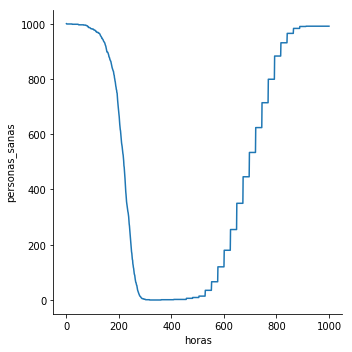

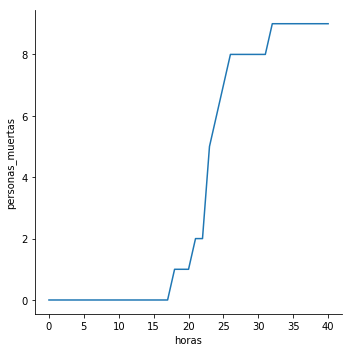

In [25]:
MiSimulador=Simulador(numpersonas,personasedificio,mortalidadEdadesCovid)
    
print(MiSimulador)
#se crea un paciente que resulta ser el 0, pasandole 15 dias como dia para el cambio de estado
MiSimulador.contagio_fijo(cambioEstadoInicial) 
MiSimulador.graficoPersonasEdades()
for i in range(horassimulacion): #horas que pasa la simulacion 
    '''
    Datos inventados:
    MediaIncubación:7 dias
    DesvIncubación:3 dias
    MediaDuracion:14 dias
    DescDuracion:5 dias
    '''
    MiSimulador.pasar_tiempo(mediaincubacion,desvincubacion,mediaduracion,desvduracion,posibilidadContagio)
    if MiSimulador.hora==0:
         
        print("--------")
        print(" ")
        print(" ")
        print(MiSimulador.dia)
        print(MiSimulador.capacidades)
        print(MiSimulador)
        #printearciudad(MiSimulador.ciudad)
        print(MiSimulador.personas_sanas())
        print(" ")
        print(" ")
        print("--------")
        print(" ")
        print(" ")
        MiSimulador.mostrarcementerio()
        print(" ")
        print(" ")
        print("--------")
        
MiSimulador.graficoPersonasSanas()
MiSimulador.graficoPersonasMuertas()

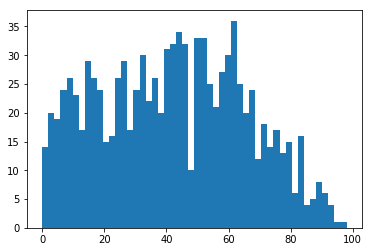

In [26]:

MiSimulador.graficoPersonasEdades()

In [27]:
 printearciudad(MiSimulador.ciudad)

925,inmune,81,55585664T,43
944,inmune,82,87803160Q,79
901,inmune,79,6534463W,80
412,inmune,38,15202362Y,16
753,inmune,63,44764167A,26

702,inmune,58,86116615S,15
898,inmune,79,63110154V,6
806,inmune,67,57367332L,62
478,inmune,43,12833638Y,30
275,inmune,27,400645P,67
927,inmune,81,86254543N,68
763,inmune,63,55055242G,43
777,inmune,65,2756880P,58
794,inmune,66,25302127B,62
131,inmune,13,36554441N,21

866,inmune,73,38348802M,49
751,inmune,63,75204315L,28
439,inmune,40,56031082T,77
617,inmune,52,77832560P,6
670,inmune,57,26486787X,57
834,inmune,68,52626211A,43

79,inmune,8,8723506C,9
690,inmune,58,23767806C,72
404,inmune,38,42870322R,85
903,inmune,80,61027521B,47

867,inmune,73,64831586Z,33
409,inmune,38,2361247K,3
624,inmune,52,46118306V,78
897,inmune,79,65516828V,30
820,inmune,67,56488644T,34
878,inmune,76,82854788W,83
773,inmune,64,80431216D,29
838,inmune,69,51200112L,7
653,inmune,56,67113567G,90
643,inmune,54,42246777D,2
853,inmune,73,28201085A,65
942,inmune,81,67154108L,84
566,inmune,

35,inmune,4,24181601E,57
783,inmune,65,35484742C,64
972,inmune,85,86008727C,6
267,inmune,25,52044233V,41
603,inmune,51,32252556R,35
140,inmune,13,12035524S,36
260,inmune,25,62780435A,33
455,inmune,41,3235351X,13

206,inmune,18,61862278Y,33
59,inmune,7,53017828E,95
229,inmune,20,28418858N,72
447,inmune,41,6050634R,69
936,inmune,81,78883447W,25
697,inmune,58,70777273V,58
0,inmune,0,82613573B,48
802,inmune,67,86338068R,44
730,inmune,60,50768231D,79
824,inmune,68,64306675D,27
717,inmune,60,8116306C,55
496,inmune,44,444331V,15
390,inmune,37,40731665E,5
858,inmune,73,52443508N,5
732,inmune,61,46836225Z,33
945,inmune,82,81024213C,14
623,inmune,52,3002247B,76

768,inmune,64,46763385S,49
71,inmune,8,15111476Q,46
752,inmune,63,28414727K,9
302,inmune,29,38402361C,41
416,inmune,39,85087766W,32
823,inmune,68,31811123F,42
130,inmune,13,67256378P,60
668,inmune,57,65506884D,61
742,inmune,62,75203853V,47

129,inmune,12,56876831Q,18
153,inmune,14,42706400T,9
56,inmune,7,45013833G,59
698,inmune,58,107607